# Decision trees
It's a non-parametric supervised learning algorithm for classification and regression tasks. Let's say we have to make a decision about something from some features A, B, C. Those features may be enough to make a complete informed decision but we need to know which is more relevant, given the data at our disposal, and what is the criteria for each of them: how much of A and of B and C ? We assume that the most relevant feature is the one with the largest variance. If we reduce the variance due to that feature we will reduce the uncertainty for our final decision.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.23.1
pandas version: 1.4.3


## The Iris data set
We download the Iris data set from the Machine Learning Repository of the University of California Irvine [website](https://archive.ics.uci.edu/ml/index.php).

In [2]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None, encoding='utf-8')
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data pre-processing
We need to prepare the data to be used for the training of the model. The pre-process consists of three steps: features selection, data partition, data normalization.

### Features selection
We copy the data from the Pandas dataframe to a NumPy array and then we select two features for the classification task: petal length and petal width

In [3]:
petal_length_col = 2
petal_width_col = 3
X = df.iloc[:, [petal_length_col, petal_width_col]].values # extract petal length and petal length
y = df.iloc[:, 4].values 
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)
y = y.astype(np.int64)
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Data partition
We split the data into a training set and a validation set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Data normalization
Finally we normalize the data. We apply a linear transformation the two subsets in order to be centered around their mean value and scaled by their standard deviation.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training the model
We use the Scikit-learn implementation of [decision trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees). 

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

## Data visualization
We define a function to plot the data and show the boundaries between the three types of iris

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

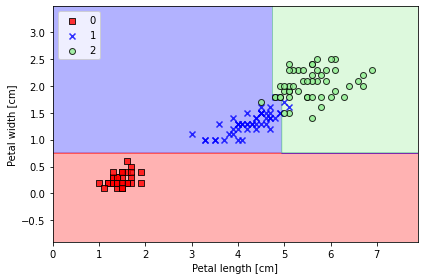

In [9]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree_model)
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

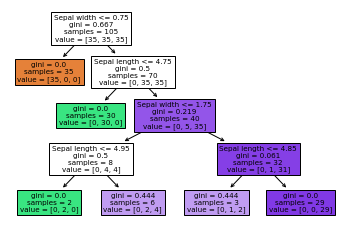

In [10]:
from sklearn import tree

feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

## Random forests
It's an ensemble method used to reduce the variance of a decision tree by averaging the output of many decision trees. We use the [Random forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests) algorithm implemented in Scikit-Learn

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

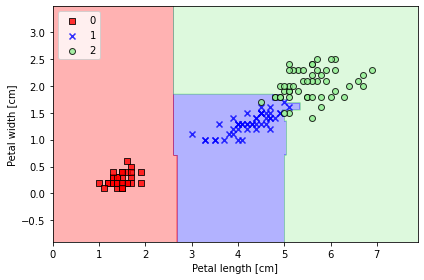

In [20]:
plot_decision_regions(X_combined, y_combined, classifier=forest)
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_2.png', dpi=300)
plt.show()